<h1> __________________Sepehr Rezaei__________________ 
<h3> ________________________rsepehr746@gmail.com________________________ 

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<h1>load data

In [2]:
text=pd.read_csv( 'spam.csv',encoding='ISO-8859-1')
text.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
text.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)
# Verify the updated DataFrame
text.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<h4>number of ham & spam sms 

In [4]:
text['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<h3>change ham to 0 and spam to 1

In [5]:
text['v1'] = text['v1'].replace({'ham': 0, 'spam': 1})
text.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


<h2>Data Pre_Processing

<h4>make words to lowercase

In [6]:
text['v2']=text['v2'].str.lower()
text.head(10)

,v1,v2
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
5,1,freemsg hey there darling it's been 3 week's n...
6,0,even my brother is not like to speak with me. ...
7,0,as per your request 'melle melle (oru minnamin...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...


<h4>removing stop words

In [7]:
from nltk.corpus import stopwords
import nltk


In [8]:
stopword=set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stopword]
    return ' '.join(words)
# Apply the remove_stopwords function to the 'sms' column
text['v2'] = text['v2'].apply(remove_stopwords)
text.head(10)

,v1,v2
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...
4,0,"nah think goes usf, lives around though"
5,1,freemsg hey darling 3 week's word back! i'd li...
6,0,even brother like speak me. treat like aids pa...
7,0,per request 'melle melle (oru minnaminunginte ...
8,1,winner!! valued network customer selected rece...
9,1,mobile 11 months more? u r entitled update lat...


<h4>Stemming with Porter stemmer 

In [9]:
from nltk.stem import porter
Pstemmer = porter.PorterStemmer()

In [10]:
text['v2'] = [Pstemmer.stem(word=wo) for wo in text['v2']]
text.head(10)

,v1,v2
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...
4,0,"nah think goes usf, lives around though"
5,1,freemsg hey darling 3 week's word back! i'd li...
6,0,even brother like speak me. treat like aids pa...
7,0,per request 'melle melle (oru minnaminunginte ...
8,1,winner!! valued network customer selected rece...
9,1,mobile 11 months more? u r entitled update lat...


<h1>store preprocessed data

In [11]:
text.to_csv('ready_text.csv')

<h2>Tokenization-TF*IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
TFFi=TfidfVectorizer()
tffi_tokenized_text=TFFi.fit_transform(text['v2'])
tffi_tokenized_text


<5572x8820 sparse matrix of type '<class 'numpy.float64'>'
	with 50149 stored elements in Compressed Sparse Row format>

<h1>Bag of Word

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(text['v2'])
bow_tokenized_text=bow_model.toarray()      # returns the rows and column number of cells which have 1 as value
print(bow_tokenized_text)  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
bow_tokenized_text.shape

(5572, 8820)

<h1>Split data to Train and test 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
tffi_x_train,tffi_x_test,tffi_y_train,tffi_y_test=train_test_split(tffi_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.3,stratify=text['v1'])
bow_x_train,bow_x_test,bow_y_train,bow_y_test=train_test_split(bow_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.3,stratify=text['v1'])

<h1>measures

In [19]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score

<h1>KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
tffi_knn=KNeighborsClassifier(n_neighbors=13)


In [22]:
bow_knn=KNeighborsClassifier(n_neighbors=13)

<h1>Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

<h5>Random forest with TF*IDF

In [24]:
tffi_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')


<h5>Random_forest with BOW

In [25]:
bow_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')


<h1>SVM

In [26]:
from sklearn import svm

<h5>SVM with TF*IDF

In [27]:
tffi_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)


<h5>SVM with BOW

In [28]:
bow_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)


<h1>Navie Bayse


In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gb_tf=GaussianNB()


In [31]:
gb_bow=GaussianNB()


<h1>Learning MLP

In [32]:
from tensorflow import  keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

<h5>split TF*IDF data

In [33]:
mlp_tf_x_train_full, mlp_tf_x_test, mlp_tf_y_train_full, mlp_tf_y_test = train_test_split(tffi_tokenized_text.toarray(),text['v1'],random_state=42,shuffle=True,test_size=0.1,stratify=text['v1'])
mlp_tf_x_train,mlp_tf_x_valid, mlp_tf_y_train, mlp_tf_y_valid = train_test_split(mlp_tf_x_train_full, mlp_tf_y_train_full,test_size=0.1)


<h5>split BOW data

In [34]:
mlp_bow_x_train_full, mlp_bow_x_test, mlp_bow_y_train_full, mlp_bow_y_test = train_test_split(bow_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.1,stratify=text['v1'])
mlp_bow_x_train,mlp_bow_x_valid, mlp_bow_y_train, mlp_bow_y_valid = train_test_split(mlp_bow_x_train_full, mlp_bow_y_train_full,test_size=0.1)


<h3>MLP with TF*IDF

In [35]:
from tensorflow import  keras
import random
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [40]:
model1 = Sequential()
model1.add(Dense(200, activation='relu', input_shape=(mlp_tf_x_train.shape[1],)))
model1.add(Dense(1, activation='sigmoid'))


compile model

In [41]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


Train and Evaluate

In [42]:
history1 = model1.fit(mlp_tf_x_train, mlp_tf_y_train, validation_data=(mlp_tf_x_valid, mlp_tf_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score1 = model1.evaluate(mlp_tf_x_test, mlp_tf_y_test)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Epoch 1/10
141/141 [==============================] - 1s 7ms/step - loss: 0.3340 - accuracy: 0.8963 - val_loss: 0.1188 - val_accuracy: 0.9721
Epoch 2/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0595 - accuracy: 0.9867 - val_loss: 0.0551 - val_accuracy: 0.9861
Epoch 3/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0200 - accuracy: 0.9953 - val_loss: 0.0448 - val_accuracy: 0.9920
Epoch 4/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.0416 - val_accuracy: 0.9920
Epoch 5/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.9996 - val_loss: 0.0410 - val_accuracy: 0.9920
Epoch 6/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 0.0415 - val_accuracy: 0.9920
Epoch 7/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9920
Epoch 

<h1>MLP with BOW

Define the neural network model

In [46]:
model2 = Sequential()
model2.add(Dense(200, activation='relu', input_shape=(mlp_bow_x_train.shape[1],)))
model2.add(Dense(1, activation='sigmoid'))

Compile the model with SCA optimizer

In [47]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Train and Evaluate

In [48]:
history2 = model2.fit(mlp_bow_x_train, mlp_bow_y_train, validation_data=(mlp_bow_x_valid, mlp_bow_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score2 = model2.evaluate(mlp_bow_x_test, mlp_bow_y_test)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/10


141/141 [==============================] - 2s 9ms/step - loss: 0.2316 - accuracy: 0.9586 - val_loss: 0.0526 - val_accuracy: 0.9940
Epoch 2/10
141/141 [==============================] - 1s 8ms/step - loss: 0.0300 - accuracy: 0.9940 - val_loss: 0.0367 - val_accuracy: 0.9920
Epoch 3/10
141/141 [==============================] - 1s 9ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.0364 - val_accuracy: 0.9920
Epoch 4/10
141/141 [==============================] - 1s 8ms/step - loss: 0.0043 - accuracy: 0.9996 - val_loss: 0.0376 - val_accuracy: 0.9920
Epoch 5/10
141/141 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.0392 - val_accuracy: 0.9920
Epoch 6/10
141/141 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0405 - val_accuracy: 0.9920
Epoch 7/10
141/141 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0419 - val_accuracy: 0.9900
Epoch 8/10
141/14

<h4>evaluate model on trainig data

In [49]:
# Evaluating the model on the train set
train_loss2, train_accuracy2 = model2.evaluate(mlp_bow_x_train, mlp_bow_y_train)
print("Train Loss:", train_loss2)
print("Train Accuracy:", train_accuracy2)

 27/141 [====>.........................] - ETA: 0s - loss: 4.7083e-04 - accuracy: 1.0000

141/141 [==============================] - 1s 4ms/step - loss: 6.0524e-04 - accuracy: 0.9998
Train Loss: 0.0006052380194887519
Train Accuracy: 0.9997783899307251


<h1>Voting betwen classifiers

In [36]:
from sklearn.ensemble import VotingClassifier

In [37]:
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.wrappers.scikit_learn import KerasClassifier
class MLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = Sequential()
        self.model.add(Dense(200, activation='relu', input_shape=(X.shape[1],)))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10, batch_size=32)

    def predict(self, X):
        return np.squeeze((self.model.predict(X) > 0.5).astype(int))

In [38]:
#votting betwen SVM and Random_f and KNN in tf-idf
ensemble1 = VotingClassifier(estimators=[ ('SVM', tffi_SVM), ('RF', tffi_Random_F), ('knn', tffi_knn)], voting='hard')

In [39]:
ensemble1.fit(tffi_x_train,tffi_y_train)

VotingClassifier(estimators=[('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [40]:
ens_prd1=ensemble1.predict(tffi_x_test)

In [41]:
ens1_precision = precision_score(y_true=tffi_y_test, y_pred=ens_prd1)
ens1_recall = recall_score(y_true=tffi_y_test,y_pred= ens_prd1)
ens1_f1 = f1_score(y_true=tffi_y_test, y_pred=ens_prd1)
ens1_accuracy = accuracy_score(y_true=tffi_y_test, y_pred=ens_prd1)

print("Accuracy:", ens1_accuracy)
print("Recall:", ens1_recall)
print("Precision:", ens1_precision)
print("F1-score:", ens1_f1)

Accuracy: 0.9772727272727273
Recall: 0.8303571428571429
Precision: 1.0
F1-score: 0.9073170731707317


<h3>votting with BOW

In [42]:
ensemble4 = VotingClassifier(estimators=[ ('SVM', bow_SVM), ('RF', bow_Random_F), ('knn', bow_knn)], voting='hard')

In [43]:
ensemble4.fit(X=bow_x_train,y=bow_y_train)
ens_prd4=ensemble4.predict(bow_x_test)

In [44]:
ens4_precision = precision_score(y_true=bow_y_test,y_pred=ens_prd4)
ens4_recall = recall_score(y_true=bow_y_test, y_pred=ens_prd4)
ens4_f1 = f1_score(y_true=bow_y_test, y_pred=ens_prd4)
ens4_accuracy = accuracy_score(y_true=bow_y_test, y_pred=ens_prd4)

print("Accuracy:", ens4_accuracy)
print("Recall:", ens4_recall)
print("Precision:", ens4_precision)
print("F1-score:", ens4_f1)

Accuracy: 0.9700956937799043
Recall: 0.7767857142857143
Precision: 1.0
F1-score: 0.8743718592964823


<h1>bagging

In [45]:
from sklearn.ensemble import BaggingClassifier

<h3>Naive Bayes

In [46]:
gb_tf_bag=BaggingClassifier(estimator=gb_tf,n_estimators=8,max_samples=0.4,bootstrap=True)
gb_tf_bag.fit(X=tffi_x_train.toarray(),y=tffi_y_train)
gb_tf_bag.score(X=tffi_x_test.toarray(),y=tffi_y_test)
gb_tf_bag_pred=gb_tf_bag.predict(X=tffi_x_test.toarray())

In [47]:
gb_bow_bag=BaggingClassifier(estimator=gb_bow,n_estimators=8,max_samples=0.4,bootstrap=True)
gb_bow_bag.fit(X=bow_x_train,y=bow_y_train)
gb_bow_bag.score(X=bow_x_test,y=bow_y_test)
gb_bow_bag_pred=gb_bow_bag.predict(X=bow_x_test)

In [48]:
gb_tf_bag_per=precision_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)
gb_tf_bag_f=f1_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)
gb_tf_bag_re=recall_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)
gb_tf_bag_ac=accuracy_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)

gb_bow_bag_per=precision_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)
gb_bow_bag_f=f1_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)
gb_bow_bag_re=recall_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)
gb_bow_bag_ac=accuracy_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)

print("\nMeasuring Naive Bayes wit tf_idf :\n")
print("Accuracy:", gb_tf_bag_ac)
print("Recall:", gb_tf_bag_re)
print("Precision:", gb_tf_bag_per)
print("F1-score:", gb_tf_bag_f)

print("\nMeasuring Naive Bayes wit BOW :\n")
print("Accuracy:", gb_bow_bag_ac)
print("Recall:", gb_bow_bag_re)
print("Precision:", gb_bow_bag_per)
print("F1-score:", gb_bow_bag_f)


Measuring Naive Bayes wit tf_idf :

Accuracy: 0.9324162679425837
Recall: 0.8348214285714286
Precision: 0.7110266159695817
F1-score: 0.7679671457905544

Measuring Naive Bayes wit BOW :

Accuracy: 0.9407894736842105
Recall: 0.8705357142857143
Precision: 0.7358490566037735
F1-score: 0.7975460122699386


<h1>Feature Selection with SCA algorithm

In [50]:
import numpy as np
from sca import SCAFUN    

<h3>We have to scale data

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler2=StandardScaler()
scaled_data=scaler2.fit_transform(tffi_tokenized_text.toarray())


In [54]:
scaled_obj_data=scaled_data.astype(float)
scaled_obj_label=text['v1'].astype(float)
scaled_obj_data.shape

(5572, 8820)

<h3>First extract TFIDF feature vectors with SCA on scaled data

In [55]:
scaled_x_train_SCA, scaled_x_valid_SCA, scaled_y_train_SCA, scaled_y_valid_SCA = train_test_split(scaled_obj_data, scaled_obj_label, test_size=0.2, stratify=scaled_obj_label,shuffle=True)

<h3>SCA by MLP

In [56]:
fold = {'x_train':scaled_x_train_SCA, 'y_train':scaled_y_train_SCA, 'x_valid':scaled_x_valid_SCA, 'y_valid':scaled_y_valid_SCA}
T    = 5   # maximum number of iterations
opts = {'fold':fold, 'T':T,'alpha':0.1}

In [57]:
SCA_output1 = SCAFUN(scaled_obj_data, scaled_obj_label, opts,'mlp')
sf1   = SCA_output1['selected_features']

Epoch 1/10
140/140 [==============================] - 1s 3ms/step - loss: 0.8074
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 0.1637
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.1257
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1004
Epoch 5/10
140/140 [==============================] - 1s 4ms/step - loss: 0.2847
Epoch 6/10
140/140 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 7/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0721
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3786
Epoch 10/10
35/35 [==============================] - 0s 1ms/step
Epoch 1/10
140/140 [==============================] - 1s 3ms/step - loss: 0.9904
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4009
Epoch 3/10
140/140 [========================

<h2>Size of selected features

In [58]:
sf1.size

4413

<h4>splite extracted scaled data

In [59]:
sca_x_train,mlp_sca_x_test,sca_y_train,mlp_sca_y_test=train_test_split(scaled_obj_data[:,sf1],scaled_obj_label,test_size=0.3,stratify=scaled_obj_label,shuffle=True)


In [60]:
mlp_sca_x_train,mlp_sca_x_valid, mlp_sca_y_train, mlp_sca_y_valid = train_test_split(sca_x_train, sca_y_train,test_size=0.2,shuffle=True)

<h1>Make mlp with SCA features

In [61]:
model5 = Sequential()
model5.add(Dense(200, activation='relu', input_shape=(mlp_sca_x_train.shape[1],)))
model5.add(Dense(1, activation='sigmoid'))

# Compile the model 
model5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history5 = model5.fit(mlp_sca_x_train, mlp_sca_y_train, validation_data=(mlp_sca_x_valid, mlp_sca_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score5 = model5.evaluate(mlp_sca_x_test, mlp_sca_y_test)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Epoch 1/10
98/98 [==============================] - 1s 4ms/step - loss: 3.1482 - accuracy: 0.7529 - val_loss: 1.3151 - val_accuracy: 0.8385
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.9619 - val_loss: 0.3002 - val_accuracy: 0.9282
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9849 - val_loss: 0.2257 - val_accuracy: 0.9410
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9878 - val_loss: 0.2160 - val_accuracy: 0.9449
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9907 - val_loss: 0.2368 - val_accuracy: 0.9449
Epoch 6/10
98/98 [==============================] - 0s 4ms/step - loss: 0.0167 - accuracy: 0.9981 - val_loss: 0.2593 - val_accuracy: 0.9462
Epoch 7/10
98/98 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9984 - val_loss: 0.3041 - val_accuracy: 0.9346
Epoch 8/10
98/98 [==

<h4>evalute model

In [62]:
y_pred_prob5 = model5.predict(mlp_sca_x_test)

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
y_pred5 = (y_pred_prob5 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision5 = precision_score(mlp_sca_y_test, y_pred5)
recall5 = recall_score(mlp_sca_y_test, y_pred5)
f15 = f1_score(mlp_sca_y_test, y_pred5)
accuracy5 = accuracy_score(mlp_sca_y_test, y_pred5)

print("Accuracy:", accuracy5)
print("Recall:", recall5)
print("Precision:", precision5)
print("F1-score:", f15)

 1/53 [..............................] - ETA: 1s

53/53 [==============================] - 0s 1ms/step
Accuracy: 0.9282296650717703
Recall: 0.8616071428571429
Precision: 0.6843971631205674
F1-score: 0.7628458498023717


<h1>KNN with SCA

In [63]:
SCA_tffi_knn=KNeighborsClassifier(n_neighbors=13)
SCA_tffi_knn.fit(X=sca_x_train,y=sca_y_train)
SCA_tffi_bow_pred=SCA_tffi_knn.predict(X=mlp_sca_x_test)
SCA_tffi_knn.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.8666267942583732

In [64]:

SCA_knn_tffi_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_accuracy = accuracy_score(y_true=mlp_sca_y_test,y_pred= SCA_tffi_bow_pred)
print("\n\nMeasuring knn wit tffi SCA :\n")
print("Accuracy:", SCA_knn_tffi_accuracy)
print("Recall:", SCA_knn_tffi_recall)
print("Precision:", SCA_knn_tffi_precision)
print("F1-score:", SCA_knn_tffi_f1)



Measuring knn wit tffi SCA :

Accuracy: 0.8666267942583732
Recall: 0.004464285714285714
Precision: 1.0
F1-score: 0.008888888888888887


<h1>Random forest with SCA

In [65]:
SCA_tffi_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
SCA_tffi_Random_F.fit(sca_x_train,sca_y_train)
SCA_tffi_Randmon_F_pred=SCA_tffi_Random_F.predict(X=mlp_sca_x_test)
SCA_tffi_Random_F.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.972488038277512

In [66]:
SCA_tffi_Random_F_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
print("Measuring Random forest wit TF*IDF :\n")
print("Accuracy:", SCA_tffi_Random_F_accuracy)
print("Recall:", SCA_tffi_Random_F_recall)
print("Precision:", SCA_tffi_Random_F_precision)
print("F1-score:", SCA_tffi_Random_F_f1)

Measuring Random forest wit TF*IDF :

Accuracy: 0.972488038277512
Recall: 0.8125
Precision: 0.978494623655914
F1-score: 0.8878048780487805


<h1>SCA SVM

In [67]:
SCA_tffi_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
SCA_tffi_SVM.fit(X=sca_x_train,y=sca_y_train)
SCA_tffi_SVM_pred=SCA_tffi_SVM.predict(X=mlp_sca_x_test)
SCA_tffi_SVM.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.9037081339712919

In [68]:

SCA_tffi_SVM_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
print("\n\nMeasuring SVM wit tf_idf :\n")
print("Accuracy:", SCA_tffi_SVM_accuracy)
print("Recall:", SCA_tffi_SVM_recall)
print("Precision:", SCA_tffi_SVM_precision)
print("F1-score:", SCA_tffi_SVM_f1)



Measuring SVM wit tf_idf :

Accuracy: 0.9037081339712919
Recall: 0.28125
Precision: 1.0
F1-score: 0.43902439024390244


<h1>Now extract BOW feature vectors with SCA 

In [69]:
bow_obj_data=bow_tokenized_text.astype(float)
bow_obj_label=text['v1'].astype(float)
bow_obj_data.shape

(5572, 8820)

split data to train and test

In [70]:
bow_x_train, bow_x_valid, bow_y_train, bow_y_valid = train_test_split(bow_obj_data, bow_obj_label, test_size=0.2, stratify=bow_obj_label)

In [71]:
fold = {'x_train':bow_x_train, 'y_train':bow_y_train, 'x_valid':bow_x_valid, 'y_valid':bow_y_valid}
T    = 5   # maximum number of iterations
opts = {'fold':fold, 'T':T,'alpha':0.1}

In [72]:
SCA_output2 = SCAFUN(bow_obj_data, bow_obj_label, opts,'mlp')
sf2   = SCA_output2['selected_features']

Epoch 1/10
140/140 [==============================] - 1s 3ms/step - loss: 0.1354
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 5/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 6/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 7/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 8/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 10/10
35/35 [==============================] - 0s 1ms/step
Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.1390
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 3/10
140/140 [========================

In [73]:
sf2.shape

(4432,)

<h4>So  8820-4462=4358 features were omitted by applying  SCA 

<h1>load extracted data

In [74]:
sca_x_bow_train,mlp_sca_x_bow_test,sca_y_bow_train,mlp_sca_y_bow_test=train_test_split(bow_obj_data[:,sf2],bow_obj_label,test_size=0.3,stratify=bow_obj_label,shuffle=True)


In [75]:
mlp_sca_bow_x_train,mlp_sca_bow_x_valid, mlp_sca_bow_y_train, mlp_sca_bow_y_valid = train_test_split(sca_x_bow_train, sca_y_bow_train,test_size=0.2,shuffle=True)


<h2>make mlp _ SCA on BOW data_

In [76]:
model6 = Sequential()
model6.add(Dense(200, activation='relu', input_shape=(mlp_sca_bow_x_train.shape[1],)))
model6.add(Dense(1, activation='sigmoid'))

# Compile the model with SCA optimizer
model6.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history6 = model6.fit(mlp_sca_bow_x_train, mlp_sca_bow_y_train, validation_data=(mlp_sca_bow_x_valid, mlp_sca_bow_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score6 = model6.evaluate(mlp_sca_x_bow_test, mlp_sca_y_bow_test)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Epoch 1/10


98/98 [==============================] - 1s 6ms/step - loss: 0.3753 - accuracy: 0.9035 - val_loss: 0.1387 - val_accuracy: 0.9692
Epoch 2/10
98/98 [==============================] - 1s 6ms/step - loss: 0.0954 - accuracy: 0.9763 - val_loss: 0.0695 - val_accuracy: 0.9833
Epoch 3/10
98/98 [==============================] - 1s 7ms/step - loss: 0.0442 - accuracy: 0.9878 - val_loss: 0.0551 - val_accuracy: 0.9833
Epoch 4/10
98/98 [==============================] - 1s 7ms/step - loss: 0.0256 - accuracy: 0.9929 - val_loss: 0.0520 - val_accuracy: 0.9846
Epoch 5/10
98/98 [==============================] - 1s 7ms/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.0516 - val_accuracy: 0.9859
Epoch 6/10
98/98 [==============================] - 1s 6ms/step - loss: 0.0120 - accuracy: 0.9981 - val_loss: 0.0521 - val_accuracy: 0.9859
Epoch 7/10
98/98 [==============================] - 1s 6ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.0538 - val_accuracy: 0.9846
Epoch 8/10
98/98 [=============

In [77]:

train_loss6, train_accuracy6 = model6.evaluate(mlp_sca_bow_x_train, mlp_sca_bow_y_train)
print("Train Loss:", train_loss6)
print("Train Accuracy:", train_accuracy6)

29/98 [=======>......................] - ETA: 0s - loss: 0.0099 - accuracy: 0.9968

98/98 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9987
Train Loss: 0.005327643360942602
Train Accuracy: 0.9987179636955261


In [78]:
y_pred_prob6 = model6.predict(mlp_sca_x_bow_test)

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
y_pred6 = (y_pred_prob6 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision6 = precision_score(mlp_sca_y_bow_test, y_pred6)
recall6 = recall_score(mlp_sca_y_bow_test, y_pred6)
f16 = f1_score(mlp_sca_y_bow_test, y_pred6)
accuracy6 = accuracy_score(mlp_sca_y_bow_test, y_pred6)

print("Accuracy:", accuracy6)
print("Recall:", recall6)
print("Precision:", precision6)
print("F1-score:", f16)

 1/53 [..............................] - ETA: 3s

53/53 [==============================] - 0s 2ms/step
Accuracy: 0.9736842105263158
Recall: 0.8169642857142857
Precision: 0.9838709677419355
F1-score: 0.8926829268292684


<h1>KNN with SCA

In [79]:
SCA_bow_knn=KNeighborsClassifier(n_neighbors=13)
SCA_bow_knn.fit(X=sca_x_bow_train,y=sca_y_bow_train)
SCA_knn_bow_pred=SCA_bow_knn.predict(X=mlp_sca_x_bow_test)
SCA_bow_knn.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.8839712918660287

In [80]:

SCA_knn_bow_precision = precision_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_knn_bow_pred)
SCA_knn_bow_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_knn_bow_pred)
SCA_knn_bow_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_knn_bow_pred)
SCA_knn_bow_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_knn_bow_pred)
print("\n\nMeasuring knn wit BOW SCA :\n")
print("Accuracy:", SCA_knn_bow_accuracy)
print("Recall:", SCA_knn_bow_recall)
print("Precision:", SCA_knn_bow_precision)
print("F1-score:", SCA_knn_bow_f1)



Measuring knn wit BOW SCA :

Accuracy: 0.8839712918660287
Recall: 0.13392857142857142
Precision: 1.0
F1-score: 0.23622047244094488


<h1>Random forest with SCA

In [81]:
SCA_bow_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
SCA_bow_Random_F.fit(sca_x_bow_train,sca_y_bow_train)
SCA_bow_Randmon_F_pred=SCA_bow_Random_F.predict(X=mlp_sca_x_bow_test)
SCA_bow_Random_F.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.9659090909090909

<h3>measuring

In [82]:
SCA_bow_Random_F_precision = precision_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_bow_Randmon_F_pred)
print("\n\nMeasuring Random forest wit BOW :\n")
print("Accuracy:", SCA_bow_Random_F_accuracy)
print("Recall:", SCA_bow_Random_F_recall)
print("Precision:", SCA_bow_Random_F_precision)
print("F1-score:", SCA_bow_Random_F_f1)



Measuring Random forest wit BOW :

Accuracy: 0.9659090909090909
Recall: 0.7589285714285714
Precision: 0.9826589595375722
F1-score: 0.8564231738035265


<h1>SCA SVM

In [83]:
SCA_bow_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
SCA_bow_SVM.fit(sca_x_bow_train,sca_y_bow_train)
SCA_bow_SVM_pred=SCA_bow_SVM.predict(X=mlp_sca_x_bow_test)
SCA_bow_SVM.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.9760765550239234

In [84]:

SCA_bow_SVM_precision = precision_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
print("\n\nMeasuring SVM wit BOW :\n")
print("Accuracy:", SCA_bow_SVM_accuracy)
print("Recall:", SCA_bow_SVM_recall)
print("Precision:", SCA_bow_SVM_precision)
print("F1-score:", SCA_bow_SVM_f1)



Measuring SVM wit BOW :

Accuracy: 0.9760765550239234
Recall: 0.84375
Precision: 0.9742268041237113
F1-score: 0.9043062200956937


<H1>Complex model

<h3>tf_idf


In [85]:
sca_x_train,mlp_sca_x_test,sca_y_train,mlp_sca_y_test=train_test_split(scaled_obj_data[:,sf1],scaled_obj_label,test_size=0.3,shuffle=False)
mlp_sca_x_train,mlp_sca_x_valid, mlp_sca_y_train, mlp_sca_y_valid = train_test_split(sca_x_train, sca_y_train,test_size=0.2,shuffle=False)

In [86]:
all_features = range(scaled_obj_data.shape[1])
remaining_features = list(set(all_features) - set(sf1))

In [87]:
sca_x_train_remaining, mlp_sca_x_test_remaining, sca_y_train_remaining, mlp_sca_y_test_remaining = train_test_split(scaled_obj_data[:, remaining_features],scaled_obj_label,test_size=0.3,shuffle=False)
sca_x_train_remaining,sca_x_valid_remaining, sca_y_train_remaining, sca_y_valid_remaining = train_test_split(sca_x_train_remaining, sca_y_train_remaining,test_size=0.2,shuffle=False)

define complex model

In [88]:
input1=keras.layers.Input(shape=(mlp_sca_x_train.shape[1],))
input2=keras.layers.Input(shape=(sca_x_train_remaining.shape[1],))
hidden1=keras.layers.Dense(100,activation='relu')(input2)
hidden2=keras.layers.Dense(200,activation='relu')(input1)
concat=keras.layers.concatenate([hidden2,hidden1])
output=keras.layers.Dense(1,activation='sigmoid')(concat)
cmodel=keras.models.Model(inputs=[input1,input2],outputs=[output])
cmodel.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
chistory = cmodel.fit((mlp_sca_x_train,sca_x_train_remaining), mlp_sca_y_train, validation_data=((mlp_sca_x_valid,sca_x_valid_remaining), mlp_sca_y_valid), epochs=10, batch_size=32)
cscore = cmodel.evaluate((mlp_sca_x_test,mlp_sca_x_test_remaining), mlp_sca_y_test)

Epoch 1/10
98/98 [==============================] - 1s 8ms/step - loss: 1.8523 - accuracy: 0.8106 - val_loss: 0.6286 - val_accuracy: 0.9064
Epoch 2/10
98/98 [==============================] - 1s 7ms/step - loss: 0.1965 - accuracy: 0.9670 - val_loss: 0.2372 - val_accuracy: 0.9513
Epoch 3/10
98/98 [==============================] - 1s 6ms/step - loss: 0.0204 - accuracy: 0.9939 - val_loss: 0.1516 - val_accuracy: 0.9615
Epoch 4/10
98/98 [==============================] - 1s 6ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.1435 - val_accuracy: 0.9641
Epoch 5/10
98/98 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.1453 - val_accuracy: 0.9654
Epoch 6/10
98/98 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1501 - val_accuracy: 0.9667
Epoch 7/10
98/98 [==============================] - 1s 6ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.1566 - val_accuracy: 0.9667
Epoch 8/10
98/98 [==

In [90]:
from matplotlib import pyplot

evaluat

In [92]:
c_y_pred= cmodel.predict((mlp_sca_x_test,mlp_sca_x_test_remaining))

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
c_y_pred = (c_y_pred >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
cprecision = precision_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
crecall = recall_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
cf1 = f1_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
caccuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
print("evaluating complex model 1")
print("Accuracy:", caccuracy)
print("Recall:", crecall)
print("Precision:", cprecision)
print("F1-score:", cf1)

 1/53 [..............................] - ETA: 3s

53/53 [==============================] - 0s 3ms/step
evaluating complex model 1
Accuracy: 0.9706937799043063
Recall: 0.868421052631579
Precision: 0.9124423963133641
F1-score: 0.8898876404494382


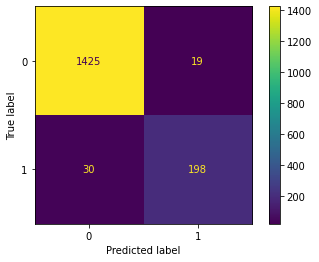

In [97]:
cm=confusion_matrix(y_true=mlp_sca_y_test, y_pred=c_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<h3>BOW

In [98]:
sca_x_bow_train,mlp_sca_x_bow_test,sca_y_bow_train,mlp_sca_y_bow_test=train_test_split(bow_obj_data[:,sf2],bow_obj_label,test_size=0.3,shuffle=False)
mlp_sca_bow_x_train,mlp_sca_bow_x_valid, mlp_sca_bow_y_train, mlp_sca_bow_y_valid = train_test_split(sca_x_bow_train, sca_y_bow_train,test_size=0.2,shuffle=False)


In [99]:
all_features2 = range(bow_obj_data.shape[1])
remaining_features2 = list(set(all_features2) - set(sf2))

In [100]:
sca_bow_x_train_remaining, mlp_bow_sca_x_test_remaining, sca_bow_y_train_remaining, mlp_sca_bow_y_test_remaining = train_test_split(bow_obj_data[:, remaining_features2],bow_obj_label,test_size=0.3,shuffle=False)
sca_bow_x_train_remaining,sca_bow_x_valid_remaining, sca_bow_y_train_remaining, sca_bow_y_valid_remaining = train_test_split(sca_bow_x_train_remaining, sca_bow_y_train_remaining,test_size=0.2,shuffle=False)

define complex model

In [101]:
input12=keras.layers.Input(shape=(mlp_sca_bow_x_train.shape[1],))
input22=keras.layers.Input(shape=(sca_bow_x_train_remaining.shape[1],))
hidden11=keras.layers.Dense(200,activation='relu')(input12)
hidden12=keras.layers.Dense(100,activation='relu')(input22)
concat2=keras.layers.concatenate([hidden11,hidden12])
output2=keras.layers.Dense(1,activation='sigmoid')(concat2)
cmodel2=keras.models.Model(inputs=[input12,input22],outputs=[output2])
cmodel2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
chistory2 = cmodel2.fit((mlp_sca_bow_x_train,sca_bow_x_train_remaining), mlp_sca_bow_y_train, validation_data=((mlp_sca_bow_x_valid,sca_bow_x_valid_remaining), mlp_sca_bow_y_valid), epochs=10, batch_size=32)
cscore2 = cmodel2.evaluate((mlp_sca_x_bow_test,mlp_bow_sca_x_test_remaining), mlp_sca_y_bow_test)

Epoch 1/10
98/98 [==============================] - 1s 10ms/step - loss: 0.3229 - accuracy: 0.9096 - val_loss: 0.1229 - val_accuracy: 0.9705
Epoch 2/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0558 - accuracy: 0.9885 - val_loss: 0.0763 - val_accuracy: 0.9782
Epoch 3/10
98/98 [==============================] - 1s 9ms/step - loss: 0.0209 - accuracy: 0.9958 - val_loss: 0.0750 - val_accuracy: 0.9782
Epoch 4/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0100 - accuracy: 0.9978 - val_loss: 0.0757 - val_accuracy: 0.9782
Epoch 5/10
98/98 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 0.0794 - val_accuracy: 0.9769
Epoch 6/10
98/98 [==============================] - 1s 9ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0827 - val_accuracy: 0.9795
Epoch 7/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9795
Epoch 8/10
98/98 [=

In [102]:
c_y_pred2= cmodel2.predict((mlp_sca_x_bow_test,mlp_bow_sca_x_test_remaining))

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
c_y_pred2 = (c_y_pred2 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
cprecision2 = precision_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
crecall2 = recall_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
cf12 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
caccuracy2 = accuracy_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)

print("Accuracy:", caccuracy2)
print("Recall:", crecall2)
print("Precision:", cprecision2)
print("F1-score:", cf12)

53/53 [==============================] - 0s 4ms/step
Accuracy: 0.9784688995215312
Recall: 0.8421052631578947
Precision: 1.0
F1-score: 0.9142857142857143


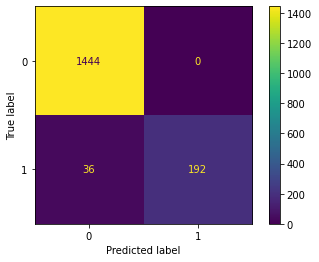

In [103]:
cm=confusion_matrix(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<h1>make result Table

In [105]:

results_mlp_56 = {'Algorithm': 'MLP-SCA', 'Accuracy_BOW': accuracy6*100 ,'Accuracy_TF-IDF':accuracy5*100 , 'Recall_BOW': recall6*100, 'Recall_TF-IDF': recall5*100,'Precision_BOW':precision6*100  ,'Precision_TF-IDF':precision5*100 ,'F-measure_BOW':f16*100,'F-measure_TF-IDF':f15*100}


results_nay_bag={'Algorithm': 'Bagging', 'Accuracy_BOW': gb_bow_bag_ac*100 ,'Accuracy_TF-IDF':gb_tf_bag_ac*100 , 'Recall_BOW': gb_bow_bag_re*100, 'Recall_TF-IDF': gb_tf_bag_re*100,'Precision_BOW':gb_bow_bag_per*100  ,'Precision_TF-IDF':gb_tf_bag_per*100 ,'F-measure_BOW':gb_bow_bag_f*100,'F-measure_TF-IDF':gb_tf_bag_f*100}

results_SCA_knn = {'Algorithm': 'KNN-SCA', 'Accuracy_BOW': SCA_knn_bow_accuracy*100 ,'Accuracy_TF-IDF':SCA_knn_tffi_accuracy*100 , 'Recall_BOW': SCA_knn_bow_recall*100, 'Recall_TF-IDF': SCA_knn_tffi_recall*100,'Precision_BOW':SCA_knn_bow_precision*100  ,'Precision_TF-IDF':SCA_knn_tffi_precision*100 ,'F-measure_BOW':SCA_knn_bow_f1*100,'F-measure_TF-IDF':SCA_knn_tffi_f1*100}
results_SCA_svm = {'Algorithm': 'SVM-SCA', 'Accuracy_BOW': SCA_bow_SVM_accuracy*100 ,'Accuracy_TF-IDF':SCA_tffi_SVM_accuracy*100 , 'Recall_BOW': SCA_bow_SVM_recall*100, 'Recall_TF-IDF': SCA_tffi_SVM_recall*100,'Precision_BOW':SCA_bow_SVM_precision*100  ,'Precision_TF-IDF':SCA_tffi_SVM_precision*100 ,'F-measure_BOW':SCA_bow_SVM_f1*100,'F-measure_TF-IDF':SCA_tffi_SVM_f1*100}
results_SCA_rf = {'Algorithm': 'R.forest-SCA', 'Accuracy_BOW': SCA_bow_Random_F_accuracy*100 ,'Accuracy_TF-IDF':SCA_tffi_Random_F_accuracy*100 , 'Recall_BOW': SCA_bow_Random_F_recall*100, 'Recall_TF-IDF': SCA_tffi_Random_F_recall*100,'Precision_BOW':SCA_bow_Random_F_precision*100  ,'Precision_TF-IDF':SCA_tffi_Random_F_precision*100 ,'F-measure_BOW':SCA_bow_Random_F_f1*100,'F-measure_TF-IDF':SCA_tffi_Random_F_f1*100}

results_Cmodel={'Algorithm': 'Complex-MLP', 'Accuracy_BOW': caccuracy2*100 ,'Accuracy_TF-IDF':caccuracy*100 , 'Precision_BOW':cprecision2*100  ,'Precision_TF-IDF':cprecision*100 ,'Recall_BOW':crecall2*100, 'Recall_TF-IDF':crecall*100,'F-measure_BOW':cf12*100,'F-measure_TF-IDF':cf1*100}


results_votting2={'Algorithm': 'Vot (SVM,KNN,RF)', 'Accuracy_BOW': ens4_accuracy*100 ,'Accuracy_TF-IDF':ens1_accuracy*100 , 'Recall_BOW': ens4_recall*100, 'Recall_TF-IDF': ens1_recall*100,'Precision_BOW':ens4_precision*100  ,'Precision_TF-IDF':ens1_precision*100 ,'F-measure_BOW':ens4_f1*100,'F-measure_TF-IDF':ens1_f1*100}

df = pd.DataFrame([results_mlp_56,results_SCA_knn,results_SCA_svm ,results_SCA_rf,results_votting2,results_nay_bag,results_Cmodel])
df.set_index('Algorithm', inplace=True)
columns = pd.MultiIndex.from_tuples([
    ('Accuracy', 'BOW'), ('Accuracy', 'TF-IDF'),
    ('Recall', 'BOW'), ('Recall', 'TF-IDF'),
    ('Precision', 'BOW'), ('Precision', 'TF-IDF'),
    
    ('F-measure', 'BOW'), ('F-measure', 'TF-IDF')
])

df.columns = columns

# Define column spacing
col_width = max(len(name) for name in df.columns.get_level_values(0))
level_width = max(len(str(level)) for level in df.columns.get_level_values(1))
spacing = 2  # Number of extra spaces between columns

# Function to format column headers with adjusted spacing
def format_columns(columns):
    return [f"{col:{col_width}s}{level:>{level_width + spacing}s}" for col, level in columns]

# Format columns with adjusted spacing
df.columns = format_columns(df.columns)

# Display the DataFrame
df

,Accuracy BOW,Accuracy TF-IDF,Recall BOW,Recall TF-IDF,Precision BOW,Precision TF-IDF,F-measure BOW,F-measure TF-IDF
Algorithm,,,,,,,,
MLP-SCA,97.368421,92.822967,81.696429,86.160714,98.387097,68.439716,89.268293,76.284585
KNN-SCA,88.397129,86.662679,13.392857,0.446429,100.000000,100.000000,23.622047,0.888889
SVM-SCA,97.607656,90.370813,84.375000,28.125000,97.422680,100.000000,90.430622,43.902439
R.forest-SCA,96.590909,97.248804,75.892857,81.250000,98.265896,97.849462,85.642317,88.780488
"Vot (SVM,KNN,RF)",97.009569,97.727273,77.678571,83.035714,100.000000,100.000000,87.437186,90.731707
Bagging,94.078947,93.241627,87.053571,83.482143,73.584906,71.102662,79.754601,76.796715
Complex-MLP,97.846890,97.069378,84.210526,86.842105,100.000000,91.244240,91.428571,88.988764


<h4>Save  result table as chart.CSV

In [150]:
df.to_csv('chart_data.csv')